# SIT307 - Machine Learning Challenge (Assignment 3)

Our chosen dataset is [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

Prepared by

| Student           | Student ID |
|-------------------|------------|
| HOOMAN SHYKHIPOUR | 220060109  |
| SARAH GOSLING     | 220094149  |
| DEVIN JAYASINGHE  | 220228075  |
| RYAN WAITES       | 215127684  |
| ANTHONY GEORGE    | 220180567  |
| MATT KINNIA       | 219311697  |

In [283]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno

In [284]:
# Ignore inline warnings thrown by packages
warnings.filterwarnings("ignore")

In [285]:
life_df = pd.read_csv('Cleaned_Life_Expectancy_Data.csv', delimiter=',')

# Section 1: Introduction

# Section 2: Machine Learning

## Section 2.1: Classification

The aim of this to find a classifiaction model which can predict if a given data is from developed or developing country (status column). First,'STATUS' column is set as the target and features are 'LIFE_EXPECTANCY','ALCOHOL','ADULT_MORTALITY','BMI','INFANT_DEATHS','SCHOOLING'

In [286]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

### Decision Tree

In [287]:
# removing any N/A values
cols = ['STATUS','LIFE_EXPECTANCY', 'ALCOHOL', 'ADULT_MORTALITY','BMI', 'INFANT_DEATHS', 'SCHOOLING']
ML_life_df = life_df[cols]
ML_life_df = ML_life_df.dropna()

In [288]:
# define X and y
feature_cols = ['LIFE_EXPECTANCY', 'ALCOHOL', 'ADULT_MORTALITY','BMI', 'INFANT_DEATHS', 'SCHOOLING']
X = ML_life_df[feature_cols]
y = ML_life_df['STATUS']
y=y.astype('int')

In [289]:
#Spliting dataset into training and testing (80% train - 20% test)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [290]:
# Fit our training data
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
%time treeclf.fit(Xtrain, ytrain)

CPU times: total: 15.6 ms
Wall time: 10 ms


DecisionTreeClassifier(max_depth=7, random_state=1)

In [291]:
#calculating scores by StratifiedKFold
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)*100))
print("Standard Deviation: %.3f%%"%(np.std(scores)*100))

Accuracy for each fold: [0.98173516 0.95890411 0.96347032 0.99086758 0.95890411 0.96803653
 0.96803653 0.97260274 0.95412844 0.96788991]
Mean Accuracy: 96.84575426249424
Standard Deviation: 1.053%


In [292]:
#calculating scores by ShuffleSplit
scores = cross_val_score(treeclf, Xtrain, ytrain, cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0), scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: %.3f%%"%(np.mean(scores)*100))
print("Standard Deviation: %.3f%%"%(np.std(scores)*100))

Accuracy for each fold: [0.97260274 0.97945205 0.96803653 0.95890411 0.956621   0.97260274
 0.96575342 0.93835616 0.98401826 0.96575342]
Mean Accuracy: 96.621%
Standard Deviation: 1.224%


### Logistic Regression

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [294]:
model = LogisticRegression(max_iter=10000)
%time model.fit(X, y)

CPU times: total: 93.8 ms
Wall time: 95.8 ms


LogisticRegression(max_iter=10000)

In [295]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [296]:
results = cross_val_score(model, X, y, cv=kfold)

In [297]:
print("Accuracy for each fold: {}".format(results))
print("Mean Accuracy: %.3f%%" % (results.mean()*100.0))
print("Standard Deviation: %.3f%%" % (results.std()*100.0))

Accuracy for each fold: [0.9379562  0.93430657 0.95620438 0.93065693 0.92335766 0.93430657
 0.92673993 0.94139194 0.92673993 0.92673993]
Mean Accuracy: 93.384%
Standard Deviation: 0.920%


### Neural Network

In [298]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [299]:
# Normalisation training data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

create a neural network with 3 hidden layers, each with 30 neurons

In [300]:
mlp = MLPClassifier(hidden_layer_sizes=(200,200,200,200),momentum=0.2,max_iter=10000,alpha=0.1)

In [301]:
%time mlp.fit(Xtrain,ytrain)

CPU times: total: 27.3 s
Wall time: 12.3 s


MLPClassifier(alpha=0.1, hidden_layer_sizes=(200, 200, 200, 200),
              max_iter=10000, momentum=0.2)

In [302]:
predictions = mlp.predict(Xtest)

In [303]:
print(confusion_matrix(ytest,predictions))

[[449  11]
 [  1  87]]


In [304]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       460
           1       0.89      0.99      0.94        88

    accuracy                           0.98       548
   macro avg       0.94      0.98      0.96       548
weighted avg       0.98      0.98      0.98       548



## Section 2.2: Regression

In [305]:
# Import the required packages for out regression models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
# Pull the required columns from the source dataset.
reg_life_df = life_df[["STATUS", "LIFE_EXPECTANCY", "ALCOHOL", "ADULT_MORTALITY", "BMI", "INFANT_DEATHS", "SCHOOLING"]]
reg_life_df = reg_life_df.dropna()

# Define our x (independent) and y (dependent) variables for our regression models.
x = reg_life_df[["STATUS", "ALCOHOL", "ADULT_MORTALITY", "BMI", "INFANT_DEATHS", "SCHOOLING"]]
y = reg_life_df["LIFE_EXPECTANCY"]

In [307]:
# Split our dataset into training and testing samples. We are using 80% for training and 20% for testing.
# NOTE: Using a the "random_state" parameter ensures we get repeatable results for each execution.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression

Using an ordinary least squares Linear Regression model we can predict `LIFE_EXPECTANCY` using a one or more explanatory features.

In [308]:
# Create and train the ordinary least squares Linear Regression model based on our training data.
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [309]:
# Run a prediction using our testing data.
y_pred = linear_regression.predict(x_test)

#### Performance

TODO: Add some commentary on model performance 

In [310]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Coefficient of determination: 0.8898114900668911
Mean squared error: 9.452353769674819


[Text(0.5, 1.0, 'Actual vs. Predicted Life Expectancy'),
 Text(0.5, 0, 'Actual Value'),
 Text(0, 0.5, 'Predicted Value')]

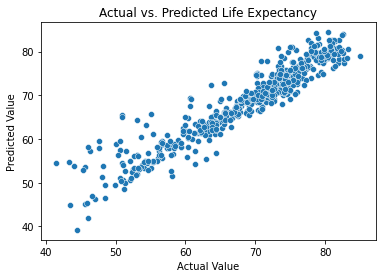

In [311]:
# Plot actual vs predicted values.
plot = sns.scatterplot(x=y_test, y=y_pred)
plot.set(title="Actual vs. Predicted Life Expectancy", xlabel="Actual Value", ylabel="Predicted Value")

### Regression Model 2?

### Regression Model 3?